In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from mpl_toolkits.mplot3d import axes3d

In [2]:
def createSphere(N,radio):
    X = np.zeros(N)
    Y = np.zeros_like(X)
    Z = np.zeros_like(X)

    for i in tqdm(range(N)):
        u=np.random.rand()
        r = radio*np.sqrt(u)
        
        theta = np.random.uniform(0,2*np.pi)
        
        h=np.sqrt(radio**2-r**2)
        z=np.random.uniform(-h,h)
        
        X[i]=r*np.cos(theta)
        Y[i] = r*np.sin(theta)
        Z[i] = z
    
    return X,Y,Z      
        
def set_aspect_equal(ax):
    """ 
    Arregla el gráfico en 3D para tener una escala similar en todos los ejes.
    """
    X = ax.get_xlim3d()
    Y = ax.get_ylim3d()
    Z = ax.get_zlim3d()
    a = [X[1]-X[0],Y[1]-Y[0],Z[1]-Z[0]]
    b = np.amax(a)
    ax.set_xlim3d(X[0]-(b-a[0])/2,X[1]+(b-a[0])/2)
    ax.set_ylim3d(Y[0]-(b-a[1])/2,Y[1]+(b-a[1])/2)
    ax.set_zlim3d(Z[0]-(b-a[2])/2,Z[1]+(b-a[2])/2)
    ax.set_box_aspect(aspect = (1,1,1))

In [51]:
radio=1
N=10000
X,Y,Z=createSphere(N,radio)

100%|██████████| 10000/10000 [00:00<00:00, 46908.96it/s]


<IPython.core.display.Javascript object>


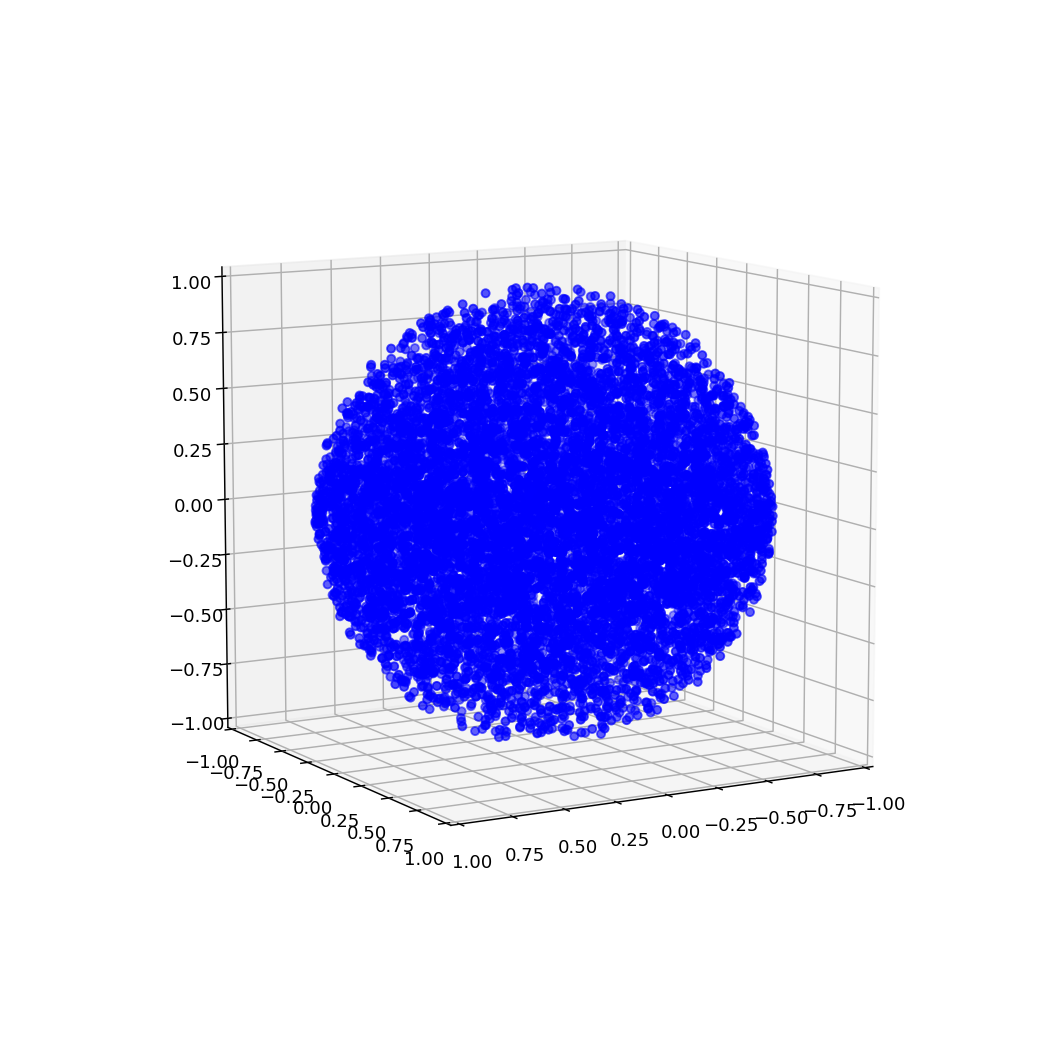

In [52]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot( projection = '3d')

min=-radio
max=radio

ax.set_xlim3d(min, max)
ax.set_ylim3d(min, max)
ax.set_zlim3d(min, max)

set_aspect_equal(ax)

ax.view_init(10, 60)

ax.scatter(X,Y,Z,color='b')

$$ \int_{}^{}\int_{}^{}\int_{}^{} e^{\sqrt{x^2+y^2+z^2}}dxdydz = 4\pi(e-2)$$

In [53]:
exactI = 4*np.pi*(np.e-2)
exactI

9.02619566197592

In [54]:
def f(x,y,z):
    w = np.e**(np.sqrt(x**2+y**2+z**2))
    return w

In [65]:
sample = np.zeros(N)

for i in range(N):
    sample[i]=f(X[i],Y[i],Z[i])

Integral = 4*np.average(sample)
Integral

9.018152521887666

In [66]:
error = (np.abs((Integral-exactI)/exactI))*100
print("Error porcentual: ",error,"%")

Error porcentual:  0.08910886036004513 %


In [67]:
print("Exactitud: ", Integral/exactI)

Exactitud:  0.9991089113963996
